In [2]:
import pandas as pd
from scipy.stats import mannwhitneyu

# Ireland

In [3]:
df_ie = pd.read_csv('safety_ie.csv')
df_ie.head()

,Statistic Label,Year,Month of Year,UNIT,VALUE
0,Fatal Collisions,2005,All months,Number,360.0
1,Fatal Collisions,2005,January,Number,31.0
2,Fatal Collisions,2005,February,Number,34.0
3,Fatal Collisions,2005,March,Number,23.0
4,Fatal Collisions,2005,April,Number,20.0


In [5]:
df_ie['Statistic Label'].unique()

array(['Fatal Collisions', 'Injury Collisions',
       'All Fatal and Injury Collisions', 'Killed Casualties',
       'Injured Casualties', 'All Killed and Injured Casualties'],
      dtype=object)

In [4]:
df_ie['Statistic Label'].value_counts()

Statistic Label
Fatal Collisions                     221
Injury Collisions                    221
All Fatal and Injury Collisions      221
Killed Casualties                    221
Injured Casualties                   221
All Killed and Injured Casualties    221
Name: count, dtype: int64

In [354]:
#We count the values

value_counts = df_ie['Statistic Label'].value_counts()
relative_frequencies = value_counts / len(df_ie)

In [355]:
import statistics as stats
#We create the subtable to find the relative frequency

subtable = pd.DataFrame({'Statistic Label': value_counts.index, 
                         'Frequency': value_counts.values, 
                         'Relative Frequency': relative_frequencies.values})
subtable

,Statistic Label,Frequency,Relative Frequency
0,Fatal Collisions,221,0.166667
1,Injury Collisions,221,0.166667
2,All Fatal and Injury Collisions,221,0.166667
3,Killed Casualties,221,0.166667
4,Injured Casualties,221,0.166667
5,All Killed and Injured Casualties,221,0.166667


In [356]:
df_ie.rename(columns={'Month of Year':'Month'}, inplace=True)
df_ie.insert(3, 'Country', 'Ireland')

In [357]:
df1 = df_ie.drop(df_ie[(df_ie["Statistic Label"] != "All Fatal and Injury Collisions")].index)
final_ie = df1[['Year', 'Month','Country']]

In [358]:
for label in df_ie['Statistic Label'].unique():
    df1 = df_ie.drop(df_ie[(df_ie["Statistic Label"] != label)].index)
    df1.rename(columns={'VALUE': label}, inplace=True)
    dff = df1[['Year', 'Month','Country', label]]
    final_ie = pd.merge(final_ie,dff)
final_ie.head()

,Year,Month,Country,Fatal Collisions,Injury Collisions,All Fatal and Injury Collisions,Killed Casualties,Injured Casualties,All Killed and Injured Casualties
0,2005,All months,Ireland,360.0,6173.0,6533.0,396.0,9318.0,9714.0
1,2005,January,Ireland,31.0,442.0,473.0,33.0,683.0,716.0
2,2005,February,Ireland,34.0,427.0,461.0,37.0,591.0,628.0
3,2005,March,Ireland,23.0,475.0,498.0,26.0,718.0,744.0
4,2005,April,Ireland,20.0,509.0,529.0,23.0,726.0,749.0


In [359]:
final_ie['Month'].unique()

array(['All months', 'January', 'February', 'March', 'April', 'May',
       'June', 'July', 'August', 'September', 'October', 'November',
       'December'], dtype=object)

In [360]:
final_ie = final_ie.drop(final_ie[(final_ie["Month"] == 'All months')].index)

In [361]:
final_ie['All Killed and Injured Casualties'] = final_ie['All Killed and Injured Casualties'].fillna(
    final_ie['All Killed and Injured Casualties'].mean())

In [362]:
final_ie.head()

,Year,Month,Country,Fatal Collisions,Injury Collisions,All Fatal and Injury Collisions,Killed Casualties,Injured Casualties,All Killed and Injured Casualties
1,2005,January,Ireland,31.0,442.0,473.0,33.0,683.0,716.0
2,2005,February,Ireland,34.0,427.0,461.0,37.0,591.0,628.0
3,2005,March,Ireland,23.0,475.0,498.0,26.0,718.0,744.0
4,2005,April,Ireland,20.0,509.0,529.0,23.0,726.0,749.0
5,2005,May,Ireland,36.0,525.0,561.0,41.0,800.0,841.0


In [364]:
mean_col= final_ie['All Fatal and Injury Collisions'].mean()
print(mean_col)
median = final_ie['All Fatal and Injury Collisions'].median()
print(median)

479.47058823529414
484.5


C:\Users\dmitri.iolchin\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\dmitri.iolchin\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 0, 'Collisions'),
 Text(0, 0.5, 'Companies'),
 Text(0.5, 1.0, 'Fatal and Injury Collisions')]

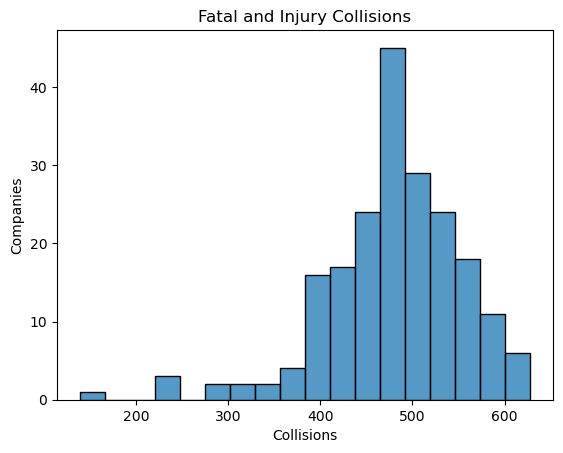

In [369]:
ax = sns.histplot(final_ie['All Fatal and Injury Collisions'])
ax.set(xlabel='Collisions', ylabel='Companies', title ='Fatal and Injury Collisions')

C:\Users\dmitri.iolchin\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\dmitri.iolchin\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 0, 'Collisions'),
 Text(0, 0.5, 'Companies'),
 Text(0.5, 1.0, 'Fatal and Injury Collisions')]

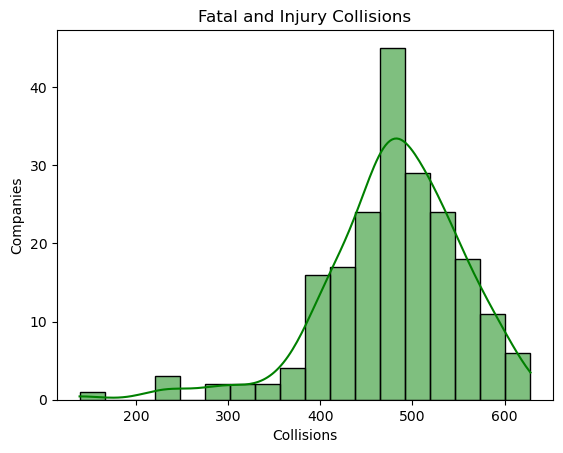

In [370]:
ax = sns.histplot(final_ie['All Fatal and Injury Collisions'], kde=True, color ='green')
ax.set(xlabel='Collisions', ylabel='Companies', title ='Fatal and Injury Collisions')

### Ireland 11 average fatalities per month in 2021 - Hypotesis Test

In [133]:
fatal = final_ie.drop(final_ie[(final_ie["Year"] != 2021)].index)

In [134]:
from statsmodels.stats import weightstats
#H0: mu = 11
#H1: mu > 11

In [135]:
X = fatal['Fatal Collisions']

In [136]:
mu = 11

In [137]:
#We compute z and p-value

z_score, p_value = weightstats.ztest(X, value = mu, ddof = 1, alternative = 'larger')

p_value

0.676234106138721

# Greece

In [403]:
df_gr = pd.read_csv('safety_gr.csv')
df_gr.head()

,Reference month,Road Traffic Accidents,Killed,Seriously Injured,Slightly Injured
0,Jan-04,1010,111,134,1159
1,Feb-04,1039,114,146,1168
2,Mar-04,1164,122,143,1380
3,Apr-04,1214,137,178,1365
4,May-04,1423,144,174,1664


In [404]:
df_gr.rename(columns={'All injured': 'Injured Casualties',
                     'Killed': 'Killed Casualties',
                     'Road Traffic Accidents': 'All Fatal and Injury Collisions'}, inplace=True)

In [405]:
#taking only numeric columns
final_gr = df_gr.drop('Reference month', axis=1)

#removing commas in the numbers
final_gr['All Fatal and Injury Collisions'] = final_gr['All Fatal and Injury Collisions'].str.replace(',', '')
final_gr['Slightly Injured'] = final_gr['Slightly Injured'].str.replace(',', '')

#changing type from string to integer for all numeric columns
final_gr = final_gr.astype(int)

#Creating new column in order to have unified columns with Ireland data frame 
final_gr['Injured Casualties'] = final_gr['Seriously Injured'] + final_gr['Slightly Injured']
final_gr['All Killed and Injured Casualties'] = final_gr['Killed Casualties'] + final_no['Injured Casualties']

#dropping unnecessary columns
final_gr = final_gr.drop(['Seriously Injured','Slightly Injured'], axis=1)

#adding missing columns
final_gr[['Month', 'Year']] = df_gr['Reference month'].str.split('-', expand=True)
final_gr.insert(0, 'Country', 'Greece')

In [406]:
#Create month mapping in order to have unified names
month_mapping = {
    'Jan': 'January',
    '01': 'January',
    'Feb': 'February',
    '02': 'February',
    'Mar': 'March',
    '03': 'March',
    'Apr': 'April',
    '04': 'April',
    'May': 'May',
    '05': 'May',
    'Jun': 'June',
    '06': 'June',
    'Jul': 'July',
    '07': 'July',
    'Aug': 'August',
    '08': 'August',
    'Sep': 'September',
    '09': 'September',
    'Oct': 'October',
    '10': 'October',
    'Nov': 'November',
    '11': 'November',
    'Dec': 'December',
    '12': 'December'
}

In [407]:
# Replace short month names with full month names using the mapping
final_gr['Month'] = final_gr['Month'].map(month_mapping)
final_gr['Year'] = final_gr['Year'].astype(int)
final_gr['Year'] = final_gr['Year'] + 2000
final_gr.head()

,Country,All Fatal and Injury Collisions,Killed Casualties,Injured Casualties,All Killed and Injured Casualties,Month,Year
0,Greece,1010,111,1293,941.0,January,2004
1,Greece,1039,114,1314,869.0,February,2004
2,Greece,1164,122,1523,849.0,March,2004
3,Greece,1214,137,1543,882.0,April,2004
4,Greece,1423,144,1838,1192.0,May,2004


In [409]:
final_gr = final_gr.drop(final_gr[(final_gr["Year"] == 2004)| (final_gr["Year"] == 2022)| (final_gr["Year"] == 2023)].index)

In [410]:
final_gr.describe()

,All Fatal and Injury Collisions,Killed Casualties,Injured Casualties,All Killed and Injured Casualties,Year
count,204.000000,204.000000,204.000000,192.000000,204.000000
mean,1068.500000,87.946078,1335.308824,702.322917,2013.000000
std,238.350561,36.531409,332.476137,265.098539,4.911031
min,312.000000,23.000000,348.000000,289.000000,2005.000000
25%,916.500000,62.000000,1099.750000,486.000000,2009.000000
50%,1042.500000,76.000000,1304.000000,625.500000,2013.000000
75%,1225.250000,112.500000,1562.250000,897.250000,2017.000000
max,1705.000000,207.000000,2305.000000,1424.000000,2021.000000


# Norway

In [309]:
df_no = pd.read_csv('safety_no.csv')
df_no.head()

,Year,Killed,All injured
0,2005M01,19,830
1,2005M02,13,755
2,2005M03,17,727
3,2005M04,16,745
4,2005M05,13,1048


In [310]:
df_no.rename(columns={'All injured': 'Injured Casualties',
                     'Killed': 'Killed Casualties'}, inplace=True)

In [311]:
# #taking only numeric columns
final_no = df_no

final_no['All Killed and Injured Casualties'] = final_no['Killed Casualties'] + final_no['Injured Casualties']

#adding missing columns
final_no[['Year', 'Month']] = df_no['Year'].str.split('M', expand=True)
final_no.insert(3, 'Country', 'Norway')

In [312]:
final_no.head()

,Year,Killed Casualties,Injured Casualties,Country,All Killed and Injured Casualties,Month
0,2005,19,830,Norway,849,01
1,2005,13,755,Norway,768,02
2,2005,17,727,Norway,744,03
3,2005,16,745,Norway,761,04
4,2005,13,1048,Norway,1061,05


In [314]:
# Replace short month names with full month names using the mapping
final_no['Month'] = final_no['Month'].map(month_mapping)
final_no['Year'] = final_no['Year'].astype(int)
final_no.head()

,Year,Killed Casualties,Injured Casualties,Country,All Killed and Injured Casualties,Month
0,2005,19,830,Norway,849,January
1,2005,13,755,Norway,768,February
2,2005,17,727,Norway,744,March
3,2005,16,745,Norway,761,April
4,2005,13,1048,Norway,1061,May


In [315]:
final_no.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Year                               204 non-null    int32 
 1   Killed Casualties                  204 non-null    int64 
 2   Injured Casualties                 204 non-null    int64 
 3   Country                            204 non-null    object
 4   All Killed and Injured Casualties  204 non-null    int64 
 5   Month                              204 non-null    object
dtypes: int32(1), int64(3), object(2)
memory usage: 8.9+ KB


# Denmark

In [316]:
df_dk = pd.read_csv('safety_dk.csv')
df_dk.head()

,Year,Month,All Fatal and Injury Collisions
0,2004,January,476
1,2004,February,456
2,2004,March,421
3,2004,April,488
4,2004,May,522


In [317]:
df_dk.insert(3, 'Country', 'Denmark')

In [318]:
df_dk

,Year,Month,All Fatal and Injury Collisions,Country
0,2004,January,476,Denmark
1,2004,February,456,Denmark
2,2004,March,421,Denmark
3,2004,April,488,Denmark
4,2004,May,522,Denmark
...,...,...,...,...
223,2022,August,262,Denmark
224,2022,September,232,Denmark
225,2022,October,228,Denmark
226,2022,November,200,Denmark


In [319]:
final_dk = df_dk.drop(df_dk[(df_dk["Year"] == 2004)| (df_dk["Year"] == 2022)].index)

In [320]:
final_dk.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204 entries, 12 to 215
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Year                             204 non-null    int64 
 1   Month                            204 non-null    object
 2   All Fatal and Injury Collisions  204 non-null    int64 
 3   Country                          204 non-null    object
dtypes: int64(2), object(2)
memory usage: 8.0+ KB


# A one-way ANOVA analysis is used to compare means of more than two groups, while a chi-square test is used to explore the relationship between two categorical variables.

## Analyzing Collisions
### Ireland and Denmark
### years 2005-2021

In [371]:
# Creating identical data frames for each country by taking interesting columns
ie = final_ie[['Country','Year','Month','All Fatal and Injury Collisions']]
dk = final_dk[['Country','Year','Month','All Fatal and Injury Collisions']]

In [372]:
# Creating 1 data frame with data from all countries
df = pd.concat([ie,dk])

In [373]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 408 entries, 1 to 215
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          408 non-null    object 
 1   Year                             408 non-null    int64  
 2   Month                            408 non-null    object 
 3   All Fatal and Injury Collisions  408 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 15.9+ KB


C:\Users\dmitri.iolchin\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\dmitri.iolchin\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\dmitri.iolchin\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Country', ylabel='All Fatal and Injury Collisions'>

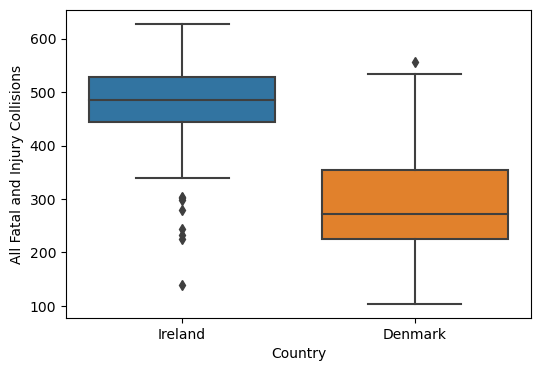

In [374]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))  # Optional: adjust figure size
sns.boxplot(x='Country', y='All Fatal and Injury Collisions', data=df)

In [375]:
#Importing the libraries

import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy as scipy

<Figure size 640x480 with 0 Axes>

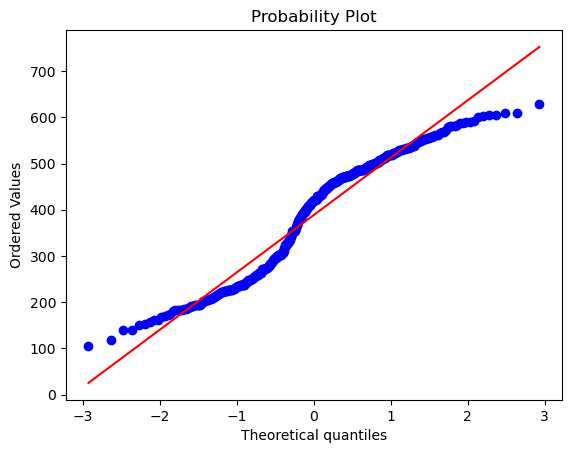

<Figure size 640x480 with 0 Axes>

In [376]:
stats.probplot(df['All Fatal and Injury Collisions'], plot = plt)
plt.figure()

##### p grater than alpha we accept the null hypotesis, so data comes from a normal distribution

In [377]:
#Shapiro test Ireland
stats.shapiro(df['All Fatal and Injury Collisions'][df.Country=="Ireland"])

ShapiroResult(statistic=0.9408243298530579, pvalue=2.142132871085778e-07)

In [378]:
#Shapiro test Denmark
stats.shapiro(df['All Fatal and Injury Collisions'][df.Country=="Denmark"])

ShapiroResult(statistic=0.9341702461242676, pvalue=5.74906167116751e-08)

Now we will check if we can assume equality of the variances

In [379]:
#we create the objects per region

IE = df['All Fatal and Injury Collisions'][df.Country=="Ireland"]
DK = df['All Fatal and Injury Collisions'][df.Country=="Denmark"]

In [380]:
#Homogeinity of the variances --> Levene test

#H0: the variances are equal
#H1: the variances are not equal

from scipy.stats import levene

levene(IE,DK,center = 'mean')

LeveneResult(statistic=26.391367543124986, pvalue=4.338119537718303e-07)

We set our hypothesis of ANOVA

In [381]:
#H0 : mu east = mu south = mu north
#H1 : there are at least 2 mu that are different oen to another one

#We work with ANOVA One Way --> We analyse the charges based on one category (region)

collisions = df['All Fatal and Injury Collisions']

model = ols("collisions~Country", data=df).fit()
aov = sm.stats.anova_lm(model, type = 2)
print(aov)

             df        sum_sq       mean_sq           F        PR(>F)
Country     1.0  3.358839e+06  3.358839e+06  425.792145  3.232857e-65
Residual  406.0  3.202710e+06  7.888448e+03         NaN           NaN


In [382]:
#H0 = means are equal
#H1 = at least one mean is different

model2 = ols('collisions~Country+Month', data=df).fit()
aov2 = sm.stats.anova_lm(model2, type = 2)
print(aov2)

             df        sum_sq       mean_sq           F        PR(>F)
Country     1.0  3.358839e+06  3.358839e+06  483.513746  1.478199e-70
Month      11.0  4.587517e+05  4.170470e+04    6.003502  4.378535e-09
Residual  395.0  2.743958e+06  6.946729e+03         NaN           NaN


# Anallyzing Casualties (ANOVA and ANOVA two-ways)

## Ireland and Norway years 2005-2021

In [383]:
final_ie.head()

,Year,Month,Country,Fatal Collisions,Injury Collisions,All Fatal and Injury Collisions,Killed Casualties,Injured Casualties,All Killed and Injured Casualties
1,2005,January,Ireland,31.0,442.0,473.0,33.0,683.0,716.0
2,2005,February,Ireland,34.0,427.0,461.0,37.0,591.0,628.0
3,2005,March,Ireland,23.0,475.0,498.0,26.0,718.0,744.0
4,2005,April,Ireland,20.0,509.0,529.0,23.0,726.0,749.0
5,2005,May,Ireland,36.0,525.0,561.0,41.0,800.0,841.0


In [384]:
final_no.head()

,Year,Killed Casualties,Injured Casualties,Country,All Killed and Injured Casualties,Month
0,2005,19,830,Norway,849,January
1,2005,13,755,Norway,768,February
2,2005,17,727,Norway,744,March
3,2005,16,745,Norway,761,April
4,2005,13,1048,Norway,1061,May


In [385]:
ie1 = final_ie[['Country','Year','Month','All Killed and Injured Casualties']]
no1 = final_no[['Country','Year','Month','All Killed and Injured Casualties']]
df1 = pd.concat([ie1,no1])

In [386]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 408 entries, 1 to 203
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country                            408 non-null    object 
 1   Year                               408 non-null    int64  
 2   Month                              408 non-null    object 
 3   All Killed and Injured Casualties  408 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 15.9+ KB


C:\Users\dmitri.iolchin\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\dmitri.iolchin\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\dmitri.iolchin\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Country', ylabel='All Killed and Injured Casualties'>

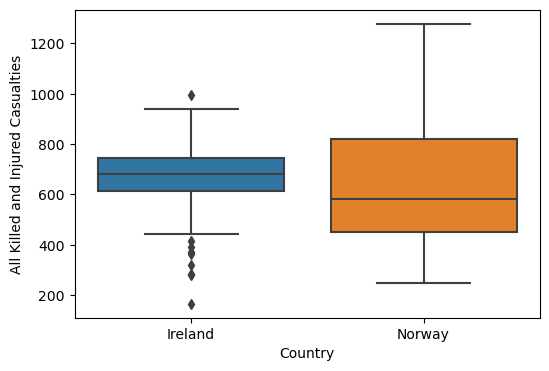

In [387]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))  # Optional: adjust figure size
sns.boxplot(x='Country', y='All Killed and Injured Casualties', data=df1)

### All Killed and Injured Casualties - ANOVA

<Figure size 640x480 with 0 Axes>

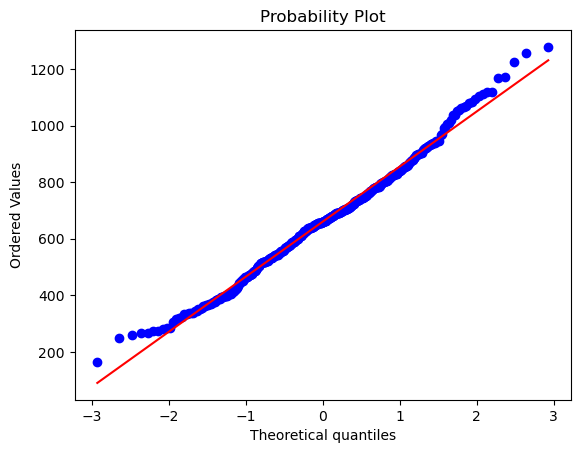

<Figure size 640x480 with 0 Axes>

In [332]:
stats.probplot(df1['All Killed and Injured Casualties'], plot = plt)
plt.figure()

In [333]:
#Shapiro test Ireland
stats.shapiro(df1['All Killed and Injured Casualties'][df1.Country=="Ireland"])

ShapiroResult(statistic=0.9651782512664795, pvalue=6.288898293860257e-05)

In [334]:
#Shapiro test Greece
stats.shapiro(df1['All Killed and Injured Casualties'][df1.Country=="Norway"])

ShapiroResult(statistic=0.9537180662155151, pvalue=3.5636187476484338e-06)

In [335]:
#we create the objects per region

IE = df1['All Killed and Injured Casualties'][df1.Country=="Ireland"]
NO = df1['All Killed and Injured Casualties'][df1.Country=="Norway"]

In [336]:
#Homogeinity of the variances --> Levene test

#H0: the variances are equal
#H1: the variances are not equal

from scipy.stats import levene

levene(IE,NO,center = 'mean')

LeveneResult(statistic=122.14991085000877, pvalue=5.2837664809553e-25)

In [337]:
#H0 : mu east = mu south = mu north
#H1 : there are at least 2 mu that are different oen to another one

#We work with ANOVA One Way --> We analyse the charges based on one category (region)

collisions = df1['All Killed and Injured Casualties']

model = ols("collisions~Country", data=df1).fit()
aov = sm.stats.anova_lm(model, type = 2)
print(aov)

             df        sum_sq        mean_sq         F    PR(>F)
Country     1.0  1.024530e+05  102452.968470  2.718786  0.099947
Residual  406.0  1.529944e+07   37683.350061       NaN       NaN


### We will use U-Mann Whitman to compare two countries

In [338]:
from scipy.stats import mannwhitneyu
stat, p=mannwhitneyu(IE,NO)
print('Statistical test:', stat)
print('p-value',p)

Statistical test: 24112.5
p-value 0.005533347891519408


### All Killed and Injured Casualties - ANOVA two-ways

In [339]:
#H0 = means are equal
#H1 = at least one mean is different

model2 = ols('collisions~Country+Month', data=df1).fit()
aov2 = sm.stats.anova_lm(model2, type = 2)
print(aov2)

             df        sum_sq        mean_sq         F    PR(>F)
Country     1.0  1.024530e+05  102452.968470  2.965785  0.085826
Month      11.0  1.654177e+06  150379.748244  4.353159  0.000004
Residual  395.0  1.364526e+07   34544.969352       NaN       NaN


In [90]:
#H0 = means are equal
#H1 = at least one mean is different

model2 = ols('collisions~Country+Month', data=df1).fit()
aov2 = sm.stats.anova_lm(model2, type = 2)
print(aov2)

             df        sum_sq       mean_sq           F         PR(>F)
Country     1.0  4.673602e+07  4.673602e+07  873.624725  4.013309e-102
Month      11.0  4.215228e+06  3.832025e+05    7.163109   3.820164e-11
Residual  395.0  2.113119e+07  5.349668e+04         NaN            NaN
